In [14]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

In [ ]:
#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'GENDER','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
df.isna().sum()

In [17]:
#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

In [48]:
df.dtypes


SOC1         object
SOC2A        object
SOC2B        object
SOC3A        object
SOC3B        object
              ...  
ECON4B       object
HHINCOME     object
EDUCATION    object
HHSIZE1      object
HH_BANNER    object
Length: 65, dtype: object

[Text(0.5, 69.0, 'Social (After Covid Pandemic)'),
 Text(69.0, 0.5, 'Social (Before Covid Pandemic')]

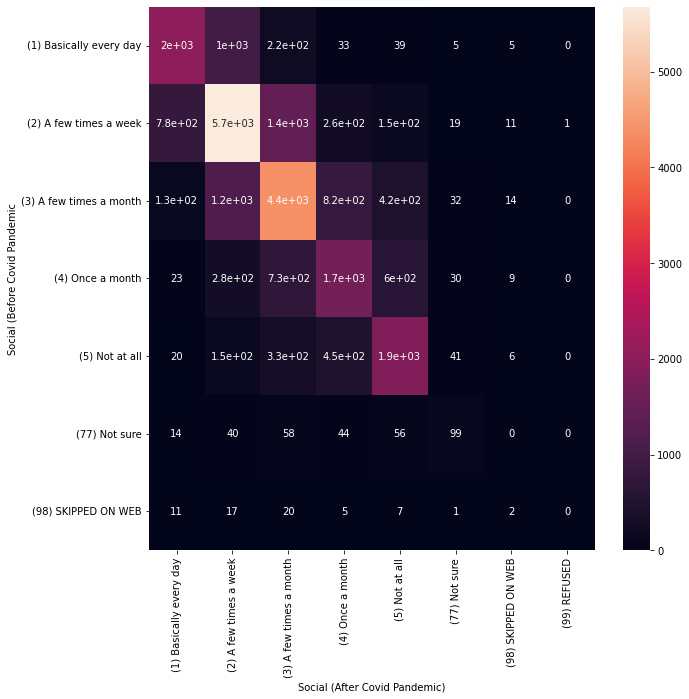

In [7]:
#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns
SE1 = pd.crosstab(df['SOC2B'],
                  df['SOC2A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True)
s.set(xlabel='Social (After Covid Pandemic)', ylabel='Social (Before Covid Pandemic')

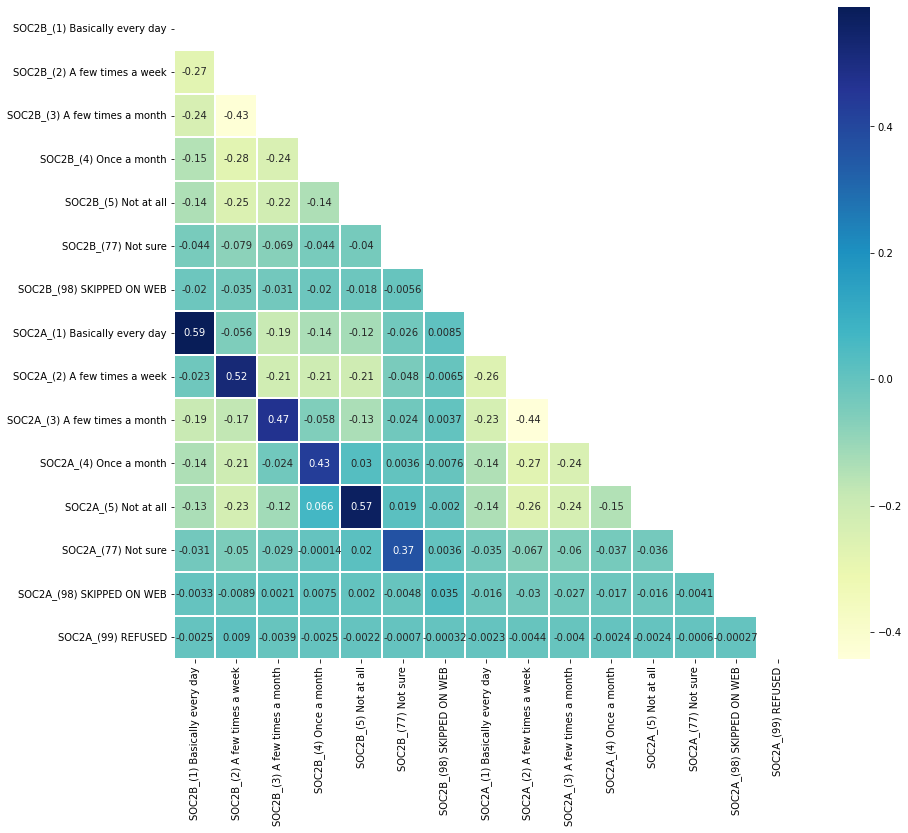

In [11]:
# SE1 : Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import numpy as np
SE1 = pd.get_dummies(df[['SOC2B','SOC2A']])

plt.figure(figsize=(14,12))
SE1_CORR = SE1.corr()
matrix = np.triu(SE1_CORR)
s=sns.heatmap(SE1_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix)
plt.yticks(rotation=0);

In [42]:
# SE1 : Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
SE1 = pd.get_dummies(df[['SOC2B','SOC2A']])

se1_1=df1[['SOC2B','SOC2A']]
data1B=se1_1['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC2B','SOC2A']]
data2B=se1_2['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC2B','SOC2A']]
data3B=se1_3['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

# data1 = pd.merge(left=data1B,right=data1A, how='left',
# left_on='counts_before', right_on='counts_after')
data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
# final_df = data1.sort_values(by=['1'], ascending=False)
data1
# se1_2=df2[['SOC2B','SOC2A']];
# se1_2=df2[['SOC2B','SOC2A']];

,unique_values,april_before,april_after,may_before,may_after,june_before,june_after
0,(1) Basically every day,0.132596,0.109908,0.131532,0.118133,0.133058,0.131856
1,(2) A few times a week,0.322198,0.315813,0.332180,0.330505,0.339517,0.348325
2,(3) A few times a month,0.281724,0.288109,0.276798,0.286623,0.268651,0.277192
3,(4) Once a month,0.136586,0.143769,0.133988,0.125391,0.126518,0.121313
4,(5) Not at all,0.113328,0.131570,0.110764,0.127959,0.115841,0.110904
5,(77) Not sure,0.010945,0.008893,0.012059,0.009268,0.014280,0.008808
6,(98) SKIPPED ON WEB,0.002622,0.001824,0.002680,0.002121,0.002135,0.001601


Text(0, 0.5, 'Pies Consumed')

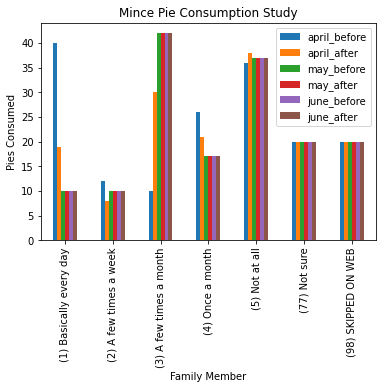

In [46]:


plotdata = pd.DataFrame({
    "april_before":[40, 12, 10, 26, 36,20,20],
    "april_after":[19, 8, 30, 21, 38,20,20],
    "may_before":[10, 10, 42, 17, 37,20,20],
    "may_after":[10, 10, 42, 17, 37,20,20],
    "june_before":[10, 10, 42, 17, 37,20,20],
    "june_after":[10, 10, 42, 17, 37,20,20]
    },
    index=data1['unique_values']
)
plotdata.plot(kind="bar")
plt.title("Social Activity Changes")
plt.xlabel("Social Activity")
plt.ylabel("Percentage")

In [51]:
data1 = data1.multiply(100).astype(int)
data1


KeyboardInterrupt

